In [1]:
import numpy as np
import pandas as pd
data=np.float64(np.load("MNIST.npy"))
labels=np.float32(np.load("MNIST_labels.npy"))
data = data/255
datanew = np.hstack([data,np.transpose(np.matrix(labels))])

In [2]:
dataframe = pd.DataFrame(datanew)
train, develop, test = np.split(dataframe.sample(frac=1),[int(.6*len(data)), int(.8*len(data))])
trainx = np.matrix(train)[:,:784]
trainy = np.array(train)[:,784]
developx = np.matrix(develop)[:,:784]
developy = np.array(develop)[:,784]
testx = np.matrix(test)[:,:784]
testy = np.array(test)[:,784]

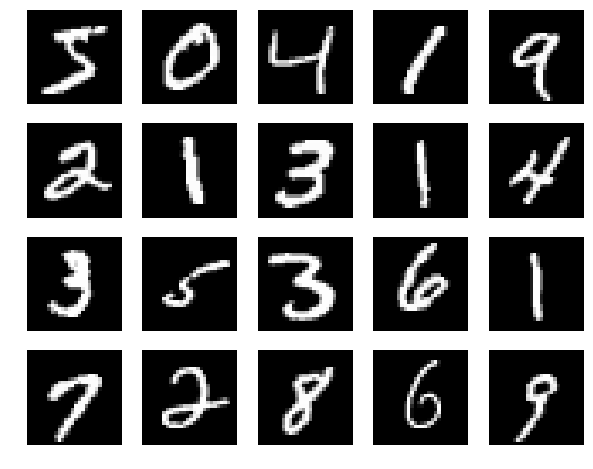

In [3]:
subset=data[:20]
%matplotlib inline
import matplotlib.pyplot as plt
nrows = 4
ncols = 5
plt.figure(figsize=(ncols*2, nrows*2))
for i in range(nrows*ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(subset[i].reshape((28,28)), cmap="gray")
    plt.axis("off")
plt.axis("off")
plt.show()

#### PCA
##### (a)

In [4]:
mean_train = np.mean(trainx, axis=0)
center_train = trainx-mean_train

In [5]:
U,S,V = np.linalg.svd(center_train,full_matrices=False)

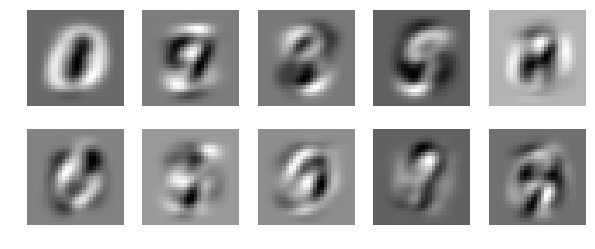

In [6]:
PC10 = V[:10]
nrows = 2
ncols = 5
plt.figure(figsize=(ncols*2, nrows*2))
for i in range(nrows*ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(PC10[i].reshape((28,28)), cmap="gray")
    plt.axis("off")
plt.axis("off")
plt.show()

#### （b) Plot Variance

Text(0,0.5,'Variance')

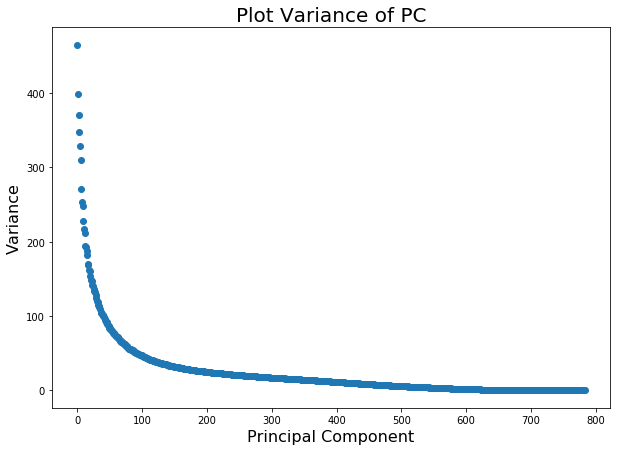

In [7]:
plt.figure(figsize=(10,7))
plt.title("Plot Variance of PC",size=20)
plt.scatter(range(len(S)),S)
plt.xlabel("Principal Component",size=16)
plt.ylabel("Variance",size=16)

#### (c) Dimension Reduction

In [8]:
mean_test = np.mean(testx, axis=0)
center_test = testx-mean_test

In [9]:
m = 30
PC = V[:m]
x = center_test[:20]
transx = np.dot(x,np.transpose(PC))
x1 = np.dot(transx,PC)
orix = x + mean_test[:20]
orix1 = x1 + mean_test[:20]

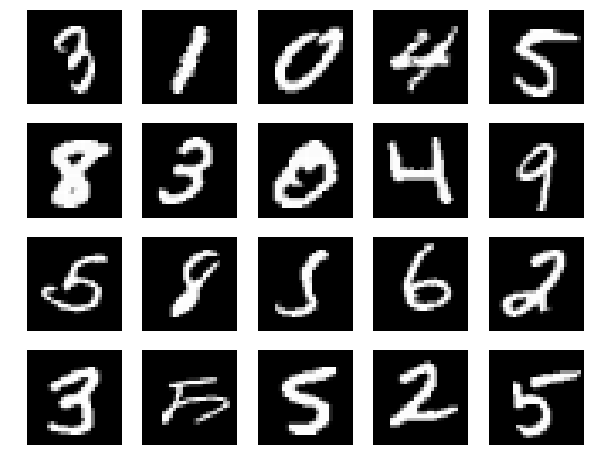

In [10]:
nrows = 4
ncols = 5
plt.figure(figsize=(ncols*2, nrows*2))
for i in range(nrows*ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(orix[i].reshape((28,28)), cmap="gray")
    plt.axis("off")
plt.axis("off")
plt.show()

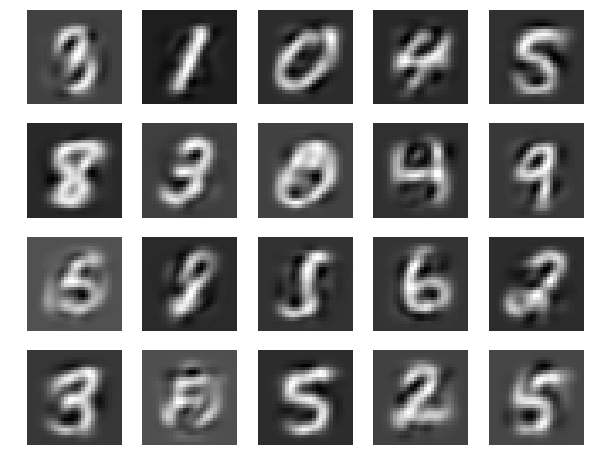

In [11]:
nrows = 4
ncols = 5
plt.figure(figsize=(ncols*2, nrows*2))
for i in range(nrows*ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(orix1[i].reshape((28,28)), cmap="gray")
    plt.axis("off")
plt.axis("off")
plt.show()

#### K-Means

##### (a)

In [12]:
from sklearn.cluster import KMeans

In [13]:
n = 30
kmeans = KMeans(n_clusters=n).fit(trainx)
y = kmeans.labels_

In [14]:
kmeans.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
y1 = kmeans.predict(testx)

#### test

In [16]:
total_sampt = list()
total_labt = list()
for j in range(n):
    samplet = list()
    samplet_label = list()
    for i in range(len(y1)):
        if y1[i]==j:
            samplet.append(testx[i])
            samplet_label.append(testy[i])
    sampt = np.array(samplet)
    sampt_lab = np.array(samplet_label)
    total_sampt.append(sampt)
    total_labt.append(sampt_lab)

In [17]:
labelctt = list()
for i in range(n):
    labelcount = dict()
    for j in range(len(total_labt[i])):
        if total_labt[i][j] in labelcount.keys():
            labelcount[total_labt[i][j]] = labelcount[total_labt[i][j]]+1
        else:
            labelcount[total_labt[i][j]] = 1
    labelctt.append(labelcount)

In [18]:
for i in range(n):
    labelctt[i] = sorted(labelctt[i].items(), key=lambda e:e[1], reverse=True)

In [19]:
labelt_final= list()
for i in range(n):
    label = labelctt[i][0]
    labelt_final.append(label)

In [20]:
labelt_final

[(2.0, 227),
 (1.0, 550),
 (7.0, 305),
 (8.0, 497),
 (3.0, 471),
 (4.0, 387),
 (0.0, 379),
 (1.0, 574),
 (9.0, 247),
 (0.0, 285),
 (0.0, 214),
 (6.0, 280),
 (1.0, 403),
 (9.0, 294),
 (6.0, 520),
 (9.0, 315),
 (5.0, 299),
 (4.0, 219),
 (7.0, 244),
 (3.0, 344),
 (5.0, 395),
 (3.0, 208),
 (6.0, 454),
 (7.0, 412),
 (2.0, 323),
 (3.0, 277),
 (0.0, 345),
 (2.0, 310),
 (2.0, 303),
 (8.0, 420)]

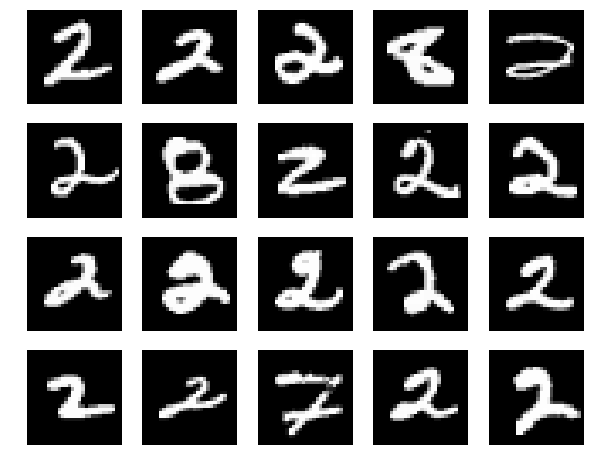

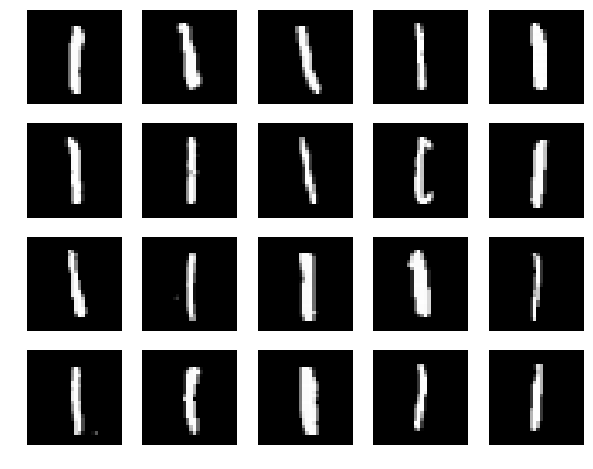

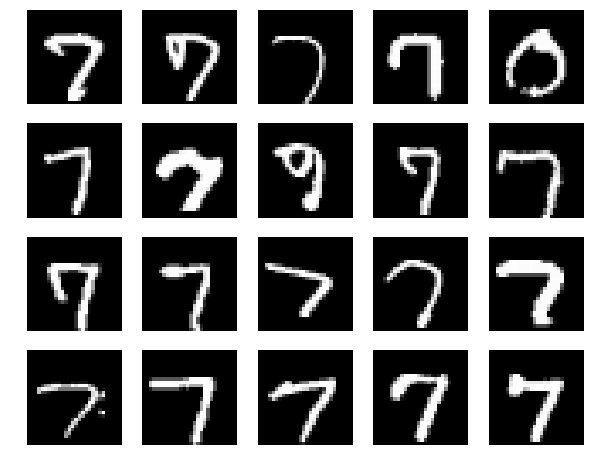

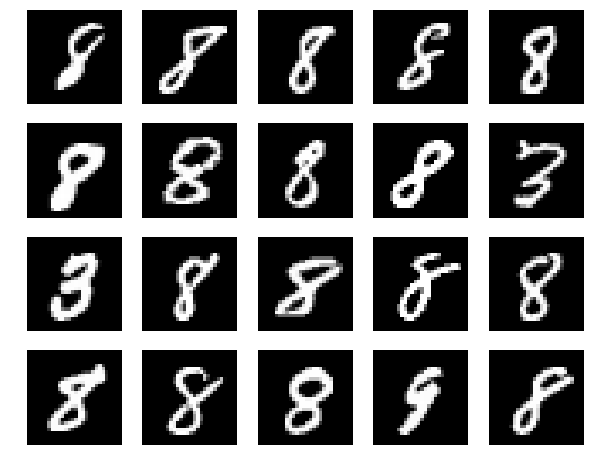

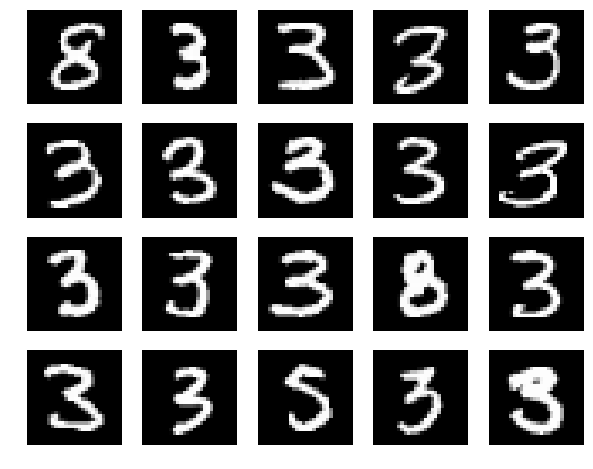

In [21]:
for j in range(5):
    nrows = 4
    ncols = 5
    plt.figure(figsize=(ncols*2, nrows*2))
    for i in range(nrows*ncols):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(total_sampt[j][i].reshape((28,28)), cmap="gray")
        plt.axis("off")
    plt.axis("off")
    plt.show()

#### train

In [22]:
total_samp = list()
total_lab = list()
for j in range(n):
    sample = list()
    sample_label = list()
    for i in range(len(y)):
        if y[i]==j:
            sample.append(trainx[i])
            sample_label.append(trainy[i])
    samp = np.array(sample)
    samp_lab = np.array(sample_label)
    total_samp.append(samp)
    total_lab.append(samp_lab)

In [23]:
labelct = list()
for i in range(n):
    labelcount = dict()
    for j in range(len(total_lab[i])):
        if total_lab[i][j] in labelcount.keys():
            labelcount[total_lab[i][j]] = labelcount[total_lab[i][j]]+1
        else:
            labelcount[total_lab[i][j]] = 1
    labelct.append(labelcount)

In [24]:
for i in range(n):
    labelct[i] = sorted(labelct[i].items(), key=lambda e:e[1], reverse=True)

In [25]:
label_final= list()
for i in range(n):
    label = labelct[i][0]
    label_final.append(label)

In [26]:
label_final

[(2.0, 761),
 (1.0, 1683),
 (7.0, 870),
 (8.0, 1411),
 (3.0, 1243),
 (4.0, 1177),
 (0.0, 1125),
 (1.0, 1649),
 (9.0, 676),
 (0.0, 920),
 (0.0, 753),
 (6.0, 958),
 (1.0, 1290),
 (9.0, 856),
 (6.0, 1514),
 (9.0, 1011),
 (5.0, 911),
 (4.0, 711),
 (7.0, 797),
 (3.0, 999),
 (5.0, 1171),
 (5.0, 630),
 (6.0, 1345),
 (7.0, 1249),
 (2.0, 1059),
 (3.0, 926),
 (0.0, 1058),
 (2.0, 897),
 (2.0, 955),
 (8.0, 1264)]

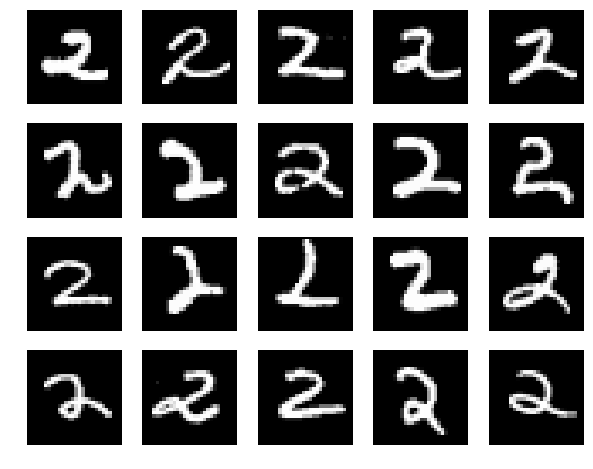

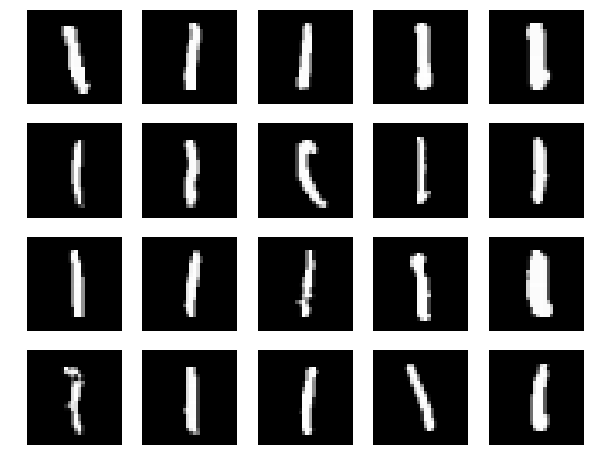

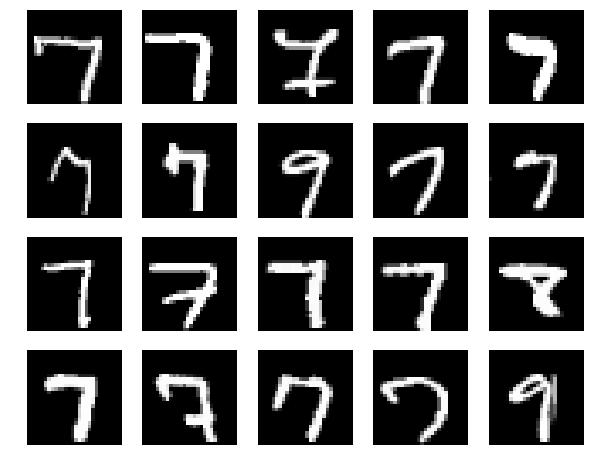

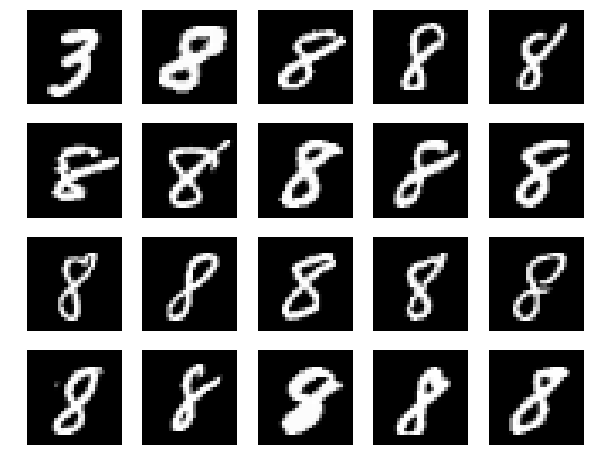

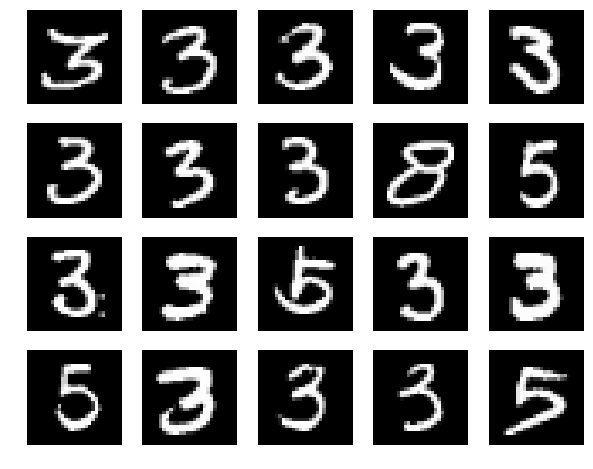

In [27]:
for j in range(5):
    nrows = 4
    ncols = 5
    plt.figure(figsize=(ncols*2, nrows*2))
    for i in range(nrows*ncols):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(total_samp[j][i].reshape((28,28)), cmap="gray")
        plt.axis("off")
    plt.axis("off")
    plt.show()

#### Spectral Clustering
##### (a)

In [3]:
W = np.zeros((len(trainx),len(trainx)))

In [ ]:
for i in range(trainx):
    for j in range(trainx):
        W[i][j] = np.exp(-np.square(np.linalg.norm(trainx[i]-trainx[j]))/2)